In [1]:
# !pip install dask

In [2]:
# !pip install graphviz

In [3]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
pwd

'C:\\Users\\debas\\Uber demand Prediction'

In [5]:
# file uploaded
df_jan_path = "C:\\Users\\debas\\Uber demand Prediction/Data/yellow_tripdata_2016-01.csv"
df_feb_path = "C:\\Users\\debas\\Uber demand Prediction/Data/yellow_tripdata_2016-02.csv"
df_mar_path = "C:\\Users\\debas\\Uber demand Prediction/Data/yellow_tripdata_2016-03.csv"

In [6]:
# update Data Frame 
df_jan = dd.read_csv(df_jan_path,assume_missing = True)
df_feb = dd.read_csv(df_feb_path,assume_missing = True)
df_mar = dd.read_csv(df_mar_path,assume_missing = True)

In [7]:
# The jan Data frame 
df_jan.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,2.0,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,1.0,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,1.0,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,2.0,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,2.0,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [8]:
# shape of all the three datasets
print("shape of january datasets",df_jan.shape)
print("shape of feb datasets",df_feb.shape)
print("shape of mar datasets",df_mar.shape)

shape of january datasets (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(b107b31)).size() // 19, dtype=int32>, 19)
shape of feb datasets (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(7359bb5)).size() // 19, dtype=int32>, 19)
shape of mar datasets (<dask_expr.expr.Scalar: expr=ArrowStringConversion(frame=FromMapProjectable(12d88c6)).size() // 19, dtype=int32>, 19)


In [9]:
# concat the three dataframes as one 
df_final = dd.concat([df_jan,df_feb,df_mar],axis = 0).drop(columns = ['extra','mta_tax','tip_amount','tolls_amount',
                                                                      'improvement_surcharge','total_amount','payment_type'])

In [10]:
df_final.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount
0,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,2.0,1.10,-73.990372,40.734695,1.0,N,-73.981842,40.732407,7.5
1,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,5.0,4.90,-73.980782,40.729912,1.0,N,-73.944473,40.716679,18.0
2,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,10.54,-73.984550,40.679565,1.0,N,-73.950272,40.788925,33.0
3,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,1.0,4.75,-73.993469,40.718990,1.0,N,-73.962242,40.657333,16.5
4,2.0,2016-01-01 00:00:00,2016-01-01 00:00:00,3.0,1.76,-73.960625,40.781330,1.0,N,-73.977264,40.758514,8.0


In [11]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [12]:
df_final.isna().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [13]:
df_final.dtypes

VendorID                         float64
tpep_pickup_datetime     string[pyarrow]
tpep_dropoff_datetime    string[pyarrow]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
dtype: object

In [14]:
# Analysis

sns.set_style("whitegrid")

In [15]:
df_final.describe().compute()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,fare_amount
count,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07,3.449986e+07
mean,1.532576e+00,1.661700e+00,5.309408e+00,-7.283942e+01,4.012605e+01,1.039150e+00,-7.290482e+01,4.016297e+01,1.257198e+01
std,4.989377e-01,1.316154e+00,4.672575e+03,9.090656e+00,5.007832e+00,5.564537e-01,8.828348e+00,4.863875e+00,9.179006e+01
min,1.000000e+00,0.000000e+00,-3.390584e+06,-1.616987e+02,-7.703949e+01,1.000000e+00,-1.616987e+02,-7.703949e+01,-9.576000e+02
25%,1.000000e+00,1.000000e+00,1.100000e+00,-7.399055e+01,4.074137e+01,1.000000e+00,-7.399009e+01,4.074001e+01,7.000000e+00
50%,2.000000e+00,1.000000e+00,1.930000e+00,-7.397922e+01,4.075640e+01,1.000000e+00,-7.397832e+01,4.075612e+01,1.000000e+01
75%,2.000000e+00,2.000000e+00,3.800000e+00,-7.396252e+01,4.076979e+01,1.000000e+00,-7.395599e+01,4.077166e+01,1.550000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,9.464387e+01,6.685682e+01,9.900000e+01,3.889659e+01,4.053167e+02,4.294967e+05


In [16]:
# vendor id 

vendor_share = (
    df_final["VendorID"]
    .value_counts(normalize = True)
    .compute()
)

In [17]:
vendor_share

VendorID
2.0    0.532576
1.0    0.467424
Name: proportion, dtype: float64

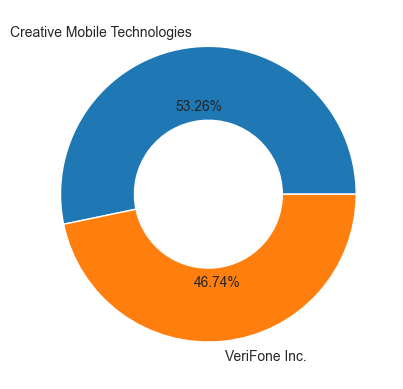

In [18]:
# donut chart

plt.pie(vendor_share,labels = ["Creative Mobile Technologies","VeriFone Inc."],autopct = "%.2f%%",
       radius = 1,wedgeprops = dict(width = 0.5,edgecolor = "w"))
plt.show()

In [19]:
# passenger count
passenger_count = df_final["passenger_count"].value_counts().compute()

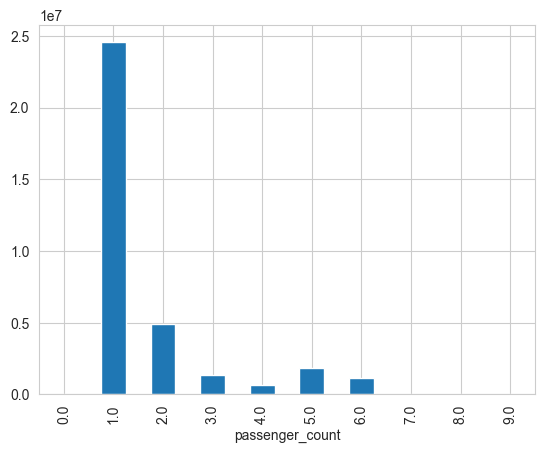

In [20]:
passenger_count.sort_index().plot(kind = "bar")
plt.show()

In [21]:
# Trip Distance
df_final["trip_distance"]

Dask Series Structure:
npartitions=82
    float64
        ...
     ...   
        ...
        ...
Dask Name: getitem, 9 expressions
Expr=(Drop(frame=Concat(frames=[ArrowStringConversion(frame=FromMapProjectable(b107b31)), ArrowStringConversion(frame=FromMapProjectable(7359bb5)), ArrowStringConversion(frame=FromMapProjectable(12d88c6))], ), columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'payment_type']))['trip_distance']

<Axes: ylabel='trip_distance'>

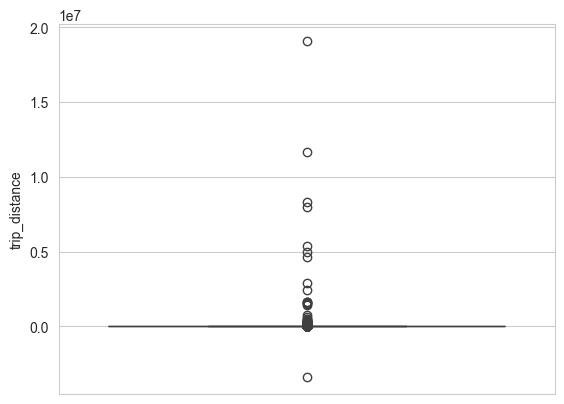

In [22]:
sns.boxplot(df_final.loc[:,"trip_distance"].compute())

In [23]:
percentile_values = np.arange(0.1, 1.0, 0.1)

for percentile in percentile_values:
    value = df_final["trip_distance"].quantile(q=percentile).compute()
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {value}")


The trip distance value for 10th percentile is 0.7
The trip distance value for 20th percentile is 0.97
The trip distance value for 30th percentile is 1.23
The trip distance value for 40th percentile is 1.56
The trip distance value for 50th percentile is 1.93
The trip distance value for 60th percentile is 2.49
The trip distance value for 70th percentile is 3.27
The trip distance value for 80th percentile is 4.6
The trip distance value for 90th percentile is 8.3


<Axes: ylabel='fare_amount'>

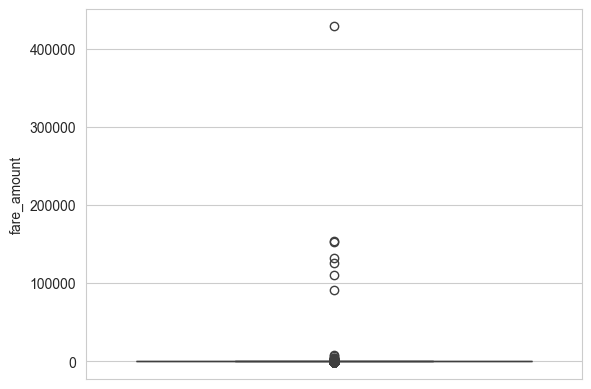

In [24]:
# Fare Amount

sns.boxplot(df_final.loc[:,"fare_amount"].compute())

In [25]:
percentile_values = np.arange(0.1, 1.0, 0.1)

for percentile in percentile_values:
    value = df_final["fare_amount"].quantile(q=percentile).compute()
    print(f"The trip distance value for {int(percentile * 100)}th percentile is {value}")

The trip distance value for 10th percentile is 5.0
The trip distance value for 20th percentile is 6.0
The trip distance value for 30th percentile is 7.5
The trip distance value for 40th percentile is 8.5
The trip distance value for 50th percentile is 10.0
The trip distance value for 60th percentile is 11.5
The trip distance value for 70th percentile is 14.0
The trip distance value for 80th percentile is 18.0
The trip distance value for 90th percentile is 27.0


In [26]:
# RateCode ID
rate_code_ids = (
    df_final.loc[:,"RatecodeID"]
    .value_counts()
    .compute()
)

In [27]:
rate_code_ids

RatecodeID
3.0        56169
4.0        14459
99.0         835
2.0       697595
6.0          320
1.0     33627000
5.0       103481
Name: count, dtype: int64

In [28]:
# unique values in rate code column
print(rate_code_ids.sort_index().index.tolist())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]


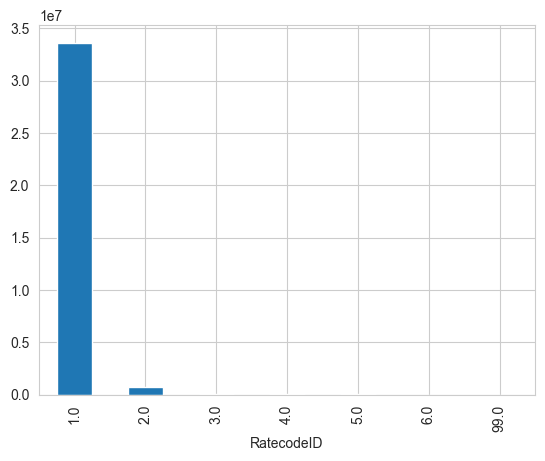

In [29]:
# plot the bar plot to display the distribution of categories

rate_code_ids.sort_index().plot(kind = 'bar')
plt.show()

In [30]:
#Location Based Columns 

location_subset = df_final[['pickup_latitude','pickup_longitude',
                           'dropoff_latitude','dropoff_longitude']]

location_subset

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
npartitions=82,,,,
,float64,float64,float64,float64
,...,...,...,...
...,...,...,...,...
,...,...,...,...
,...,...,...,...


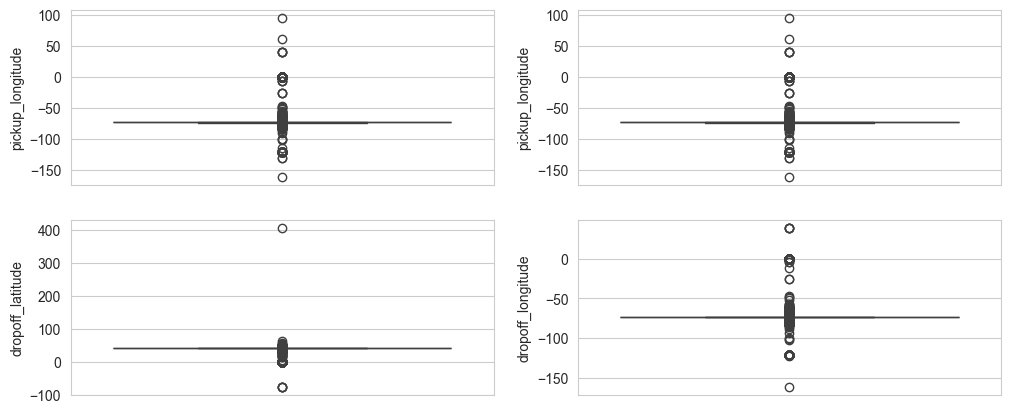

In [31]:
# boxplots for location based columns

fig,(ax1,ax2) = plt.subplots(nrows = 2,ncols = 2,figsize = (12,5))
for i in range(4):
    if i<=1:
        sns.boxplot(y=location_subset.iloc[:,1].compute(),ax = ax1[i])
    else:
        sns.boxplot(y = location_subset.iloc[:,i].compute(),ax = ax2[i-2])

<Axes: xlabel='count', ylabel='store_and_fwd_flag'>

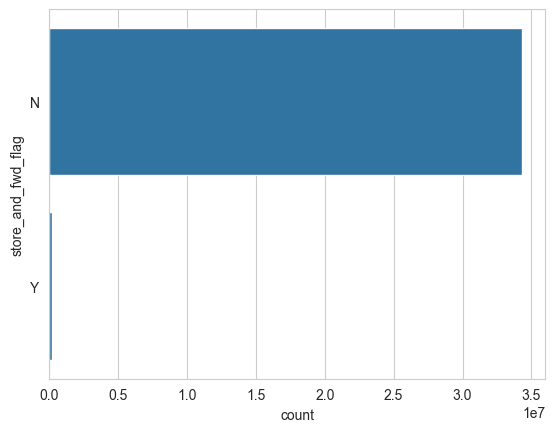

In [32]:
# store and Fwd flag
sns.countplot(df_final["store_and_fwd_flag"].compute())

In [33]:
# Dealing with the date time columns 
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [34]:
# convert the columns to datetime 
df_final['tpep_pickup_datetime'] = dd.to_datetime(df_final['tpep_pickup_datetime'],yearfirst = True,format="%Y-%m-%d %H:%M:%S", errors="coerce")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final['tpep_dropoff_datetime'],yearfirst = True,format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [35]:
# creating new columns like month,day of week,hour

df_final["pickup_months"] = df_final["tpep_pickup_datetime"].dt.month
df_final["pickup_day_of_week"] = df_final["tpep_pickup_datetime"].dt.dayofweek
df_final["pickup_hour"] = df_final["tpep_pickup_datetime"].dt.hour

In [36]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'pickup_months',
       'pickup_day_of_week', 'pickup_hour'],
      dtype='object')

In [37]:
df_final.dtypes

VendorID                         float64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                  float64
trip_distance                    float64
pickup_longitude                 float64
pickup_latitude                  float64
RatecodeID                       float64
store_and_fwd_flag       string[pyarrow]
dropoff_longitude                float64
dropoff_latitude                 float64
fare_amount                      float64
pickup_months                      int32
pickup_day_of_week                 int32
pickup_hour                        int32
dtype: object

In [38]:
df_final

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,pickup_months,pickup_day_of_week,pickup_hour
npartitions=82,,,,,,,,,,,,,,,
,float64,datetime64[ns],datetime64[ns],float64,float64,float64,float64,float64,string,float64,float64,float64,int32,int32,int32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [40]:
# plot the number of pickups

pickups_every_3_days = (
    df_final
    .set_index("tpep_pickup_datetime",sorted=False,shuffle = "tasks")
    .resample("3D")
    .size()
    .compute()
)

In [41]:
pickups_every_3_days

tpep_pickup_datetime
2016-01-01     960746
2016-01-04    1007938
2016-01-07    1162789
2016-01-10    1061829
2016-01-13    1192852
2016-01-16    1132536
2016-01-19    1166946
2016-01-22     658061
2016-01-25     968922
2016-01-28    1232734
2016-01-31    1065990
2016-02-03    1176173
2016-02-06    1144752
2016-02-09    1192598
2016-02-12    1285409
2016-02-15    1101217
2016-02-18    1256220
2016-02-21    1114674
2016-02-24    1251497
2016-02-27    1155024
2016-03-01    1208179
2016-03-04    1270530
2016-03-07    1106194
2016-03-10    1273983
2016-03-13    1134075
2016-03-16    1234570
2016-03-19    1176151
2016-03-22    1155525
2016-03-25    1149227
2016-03-28    1108463
2016-03-31     394055
Freq: 3D, dtype: int64

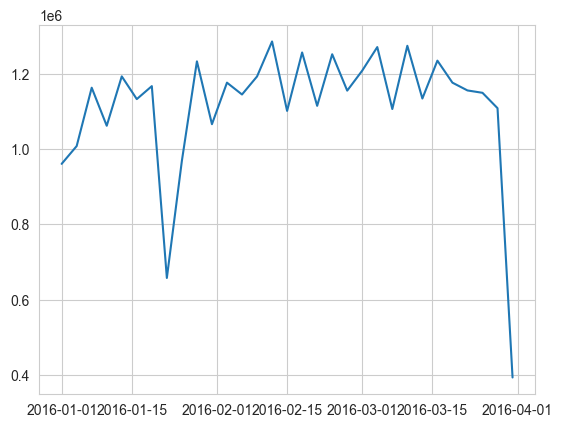

In [44]:
plt.plot(pickups_every_3_days)
plt.show()

In [51]:
#pickups for each hour of the day
pickups_each_hour = (df_final
                    .groupby(['pickup_hour','pickup_day_of_week'])["VendorID"]
                    .count()
                    .compute()
                    )

In [53]:
pickups_each_hour

pickup_hour  pickup_day_of_week
4            2                      29498
             3                      32480
5            2                      49844
6            2                     136330
             3                     138392
                                    ...  
23           5                     299024
0            0                     100903
             1                     101299
19           0                     291911
23           0                     154325
Name: VendorID, Length: 168, dtype: int64

In [54]:
day_names = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

replacement_mapper = {k:v for k,v in enumerate(day_names)}

replacement_mapper

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [62]:
pickups_each_hour_frame = pickups_each_hour.to_frame()

In [64]:
pickups_each_hour_frame=pickups_each_hour_frame.reset_index()

In [65]:
pickups_each_hour_frame

,pickup_hour,pickup_day_of_week,VendorID
0,4,2,29498
1,4,3,32480
2,5,2,49844
3,6,2,136330
4,6,3,138392
...,...,...,...
163,23,5,299024
164,0,0,100903
165,0,1,101299
166,19,0,291911


In [67]:
pickups_each_hour_frame.rename(columns = {"VendorID":"Number of pickups"},inplace=True)

In [68]:
pickups_each_hour_frame.replace({"pickup_day_of_week": replacement_mapper}, inplace=True)

In [69]:
pickups_each_hour_frame

,pickup_hour,pickup_day_of_week,Number of pickups
0,4,Wed,29498
1,4,Thu,32480
2,5,Wed,49844
3,6,Wed,136330
4,6,Thu,138392
...,...,...,...
163,23,Sat,299024
164,0,Mon,100903
165,0,Tue,101299
166,19,Mon,291911


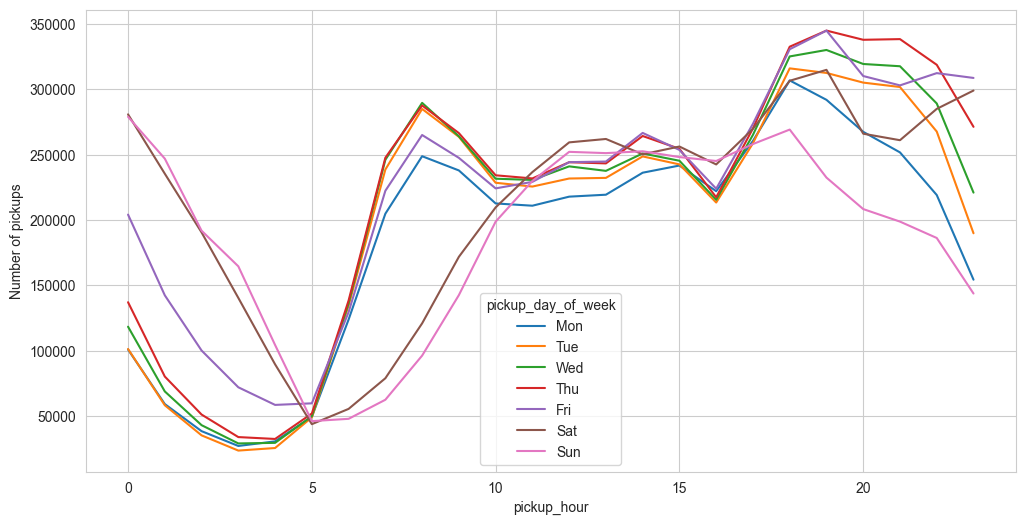

In [71]:
# plot the lineplot
fig = plt.figure(figsize = (12,6))

sns.lineplot(pickups_each_hour_frame,x="pickup_hour",y="Number of pickups",
             hue = "pickup_day_of_week",hue_order = day_names)

plt.show()